<a href="https://colab.research.google.com/github/Varinda22/NYC_Air_bnb_Analysis/blob/main/NYC_Air_bnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
import datetime as dt
style.use("ggplot")

In [2]:
#Reading csv file

df = pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22054,17744351,1 Bd furnished Bayridge Brooklyn NY,119029523,Ebada,Brooklyn,Fort Hamilton,40.62241,-74.02863,Entire home/apt,115.0,4.0,3.0,2019-05-19,0.48,3.0,295.0
22055,17746222,Perfect bedroom. Near Subways Columbia CityCol...,16721721,Federico,Manhattan,Harlem,40.81530,-73.95080,Private room,65.0,2.0,18.0,2018-11-04,0.64,1.0,0.0
22056,17748284,Guest BedRm in quaint NYC neighborhood. NEAR T...,25196982,Nikolas,Queens,Astoria,40.76924,-73.91702,Private room,65.0,1.0,11.0,2019-06-17,3.24,1.0,9.0
22057,17749273,1 br Woodside - close to LGA!,121096858,Caressa,Queens,Woodside,40.74176,-73.90631,Private room,35.0,1.0,0.0,NaN,NaN,1.0,0.0


In [3]:

print(" Shape of the resources dataframe is: " , df.shape)

 Shape of the resources dataframe is:  (22059, 16)


In [4]:
# Revising first 15 rows
df.head(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0


In [5]:
# Revising last 15 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22054,17744351,1 Bd furnished Bayridge Brooklyn NY,119029523,Ebada,Brooklyn,Fort Hamilton,40.62241,-74.02863,Entire home/apt,115.0,4.0,3.0,2019-05-19,0.48,3.0,295.0
22055,17746222,Perfect bedroom. Near Subways Columbia CityCol...,16721721,Federico,Manhattan,Harlem,40.81530,-73.95080,Private room,65.0,2.0,18.0,2018-11-04,0.64,1.0,0.0
22056,17748284,Guest BedRm in quaint NYC neighborhood. NEAR T...,25196982,Nikolas,Queens,Astoria,40.76924,-73.91702,Private room,65.0,1.0,11.0,2019-06-17,3.24,1.0,9.0
22057,17749273,1 br Woodside - close to LGA!,121096858,Caressa,Queens,Woodside,40.74176,-73.90631,Private room,35.0,1.0,0.0,NaN,NaN,1.0,0.0
22058,17750238,Great room in a spacious Inwood Apartment,13860679,Max,Manhattan,Inwood,40.86348,-73.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of              id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
...         ...                                                ...        ...   
22054  17744351                1 Bd furnished Bayridge Brooklyn NY  119029523   
22055  17746222  Perfect bedroom. Near Subways Columbia CityCol...   16721721   
22056  17748284  Guest BedRm in quaint NYC neighborhood. NEAR T...   25196982   
22057  17749273                      1 br Woodside - close to LGA!  121096858   
22058  17750238          Great room in a spacious Inwood Apartment   138606

In [8]:
df.info


<bound method DataFrame.info of              id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
...         ...                                                ...        ...   
22054  17744351                1 Bd furnished Bayridge Brooklyn NY  119029523   
22055  17746222  Perfect bedroom. Near Subways Columbia CityCol...   16721721   
22056  17748284  Guest BedRm in quaint NYC neighborhood. NEAR T...   25196982   
22057  17749273                      1 br Woodside - close to LGA!  121096858   
22058  17750238          Great room in a spacious Inwood Apartment   13860679

In [9]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
len(df.host_name.unique())


6476

In [11]:
len(df.name.unique())

21770

**DATA CLEANING**

In [12]:
#creating new test df with specific columns
new_df={'host_id':df['host_id'],'host_name':df['host_name'],'neighbourhood_group' : df['neighbourhood_group'],'neighbourhood':df['neighbourhood'],'latitude':df['latitude'],'longitude':df['longitude'],'room_type':df['room_type'],'price': df['price'],'minimum_nights':df['minimum_nights'],'reviews_per_month': df['reviews_per_month'],'calculated_host_listings_count':df['calculated_host_listings_count']       }
ny=pd.DataFrame(new_df)

In [13]:
ny.describe()

,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count
count,2.205900e+04,22059.000000,22059.000000,22058.000000,22058.000000,18358.000000,22058.000000
mean,2.447159e+07,40.729520,-73.956852,151.245852,7.408151,0.944976,3.721688
std,2.707545e+07,0.053118,0.039701,235.534537,23.883845,1.297014,12.938362
min,2.571000e+03,40.499790,-74.242850,10.000000,1.000000,0.010000,1.000000
25%,3.977023e+06,40.689765,-73.983265,73.000000,2.000000,0.100000,1.000000
50%,1.428111e+07,40.723370,-73.958010,110.000000,3.000000,0.360000,1.000000
75%,3.657868e+07,40.763950,-73.941490,175.000000,5.000000,1.310000,2.000000
max,1.210969e+08,40.908040,-73.000000,10000.000000,1250.000000,16.220000,121.000000


In [14]:
#Removing Outliers in Price column
Q1 = np.percentile(df['price'],25)
Q2 = np.percentile(df['price'],50)
Q3 = np.percentile(df['price'],75)
IQR =  Q3 - Q1
a=Q1-(1.5*IQR)
b=Q3+(1.5*IQR)
ny1=ny[(ny['price']<b) & (ny['price']>a)]

In [15]:
#Importing plotting library
import seaborn as sns
sns.set()

In [16]:
ny1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         0 non-null      int64  
 1   host_name                       0 non-null      object 
 2   neighbourhood_group             0 non-null      object 
 3   neighbourhood                   0 non-null      object 
 4   latitude                        0 non-null      float64
 5   longitude                       0 non-null      float64
 6   room_type                       0 non-null      object 
 7   price                           0 non-null      float64
 8   minimum_nights                  0 non-null      float64
 9   reviews_per_month               0 non-null      float64
 10  calculated_host_listings_count  0 non-null      float64
dtypes: float64(6), int64(1), object(4)
memory usage: 0.0+ bytes


In [17]:
#Attempt 2: Removing other outliers
#defining range for reasonable values
air_df=pd.DataFrame(new_df)
min= ny.price.quantile(0.01)
max = ny.price.quantile(0.996)
min, max

(32.0, 1200.0)

In [18]:
air_df= ny[(ny.price>min)&(ny.price<max)]
air_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,0.21,6.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,0.38,2.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,NaN,1.0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,4.64,1.0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,0.10,1.0


In [19]:
air_df.describe()

,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count
count,2.173500e+04,21735.000000,21735.000000,21735.000000,21735.000000,18134.000000,21735.000000
mean,2.438691e+07,40.729698,-73.957092,142.258385,7.356338,0.946505,3.741845
std,2.700684e+07,0.052980,0.038965,113.908048,23.774104,1.296970,13.027839
min,2.571000e+03,40.499790,-74.242850,33.000000,1.000000,0.010000,1.000000
25%,3.954163e+06,40.689935,-73.983340,75.000000,2.000000,0.100000,1.000000
50%,1.417649e+07,40.723510,-73.958150,110.000000,3.000000,0.360000,1.000000
75%,3.645293e+07,40.764060,-73.941770,175.000000,5.000000,1.310000,2.000000
max,1.210969e+08,40.908040,-73.712990,1195.000000,1250.000000,16.220000,121.000000


In [20]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21735 entries, 0 to 22057
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         21735 non-null  int64  
 1   host_name                       21722 non-null  object 
 2   neighbourhood_group             21735 non-null  object 
 3   neighbourhood                   21735 non-null  object 
 4   latitude                        21735 non-null  float64
 5   longitude                       21735 non-null  float64
 6   room_type                       21735 non-null  object 
 7   price                           21735 non-null  float64
 8   minimum_nights                  21735 non-null  float64
 9   reviews_per_month               18134 non-null  float64
 10  calculated_host_listings_count  21735 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


In [21]:
air_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,0.21,6.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,0.38,2.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,NaN,1.0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,4.64,1.0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,0.10,1.0


In [22]:
df.dropna(subset = ['host_name'])
top_hosts= df['host_name'].value_counts().head(10)

In [23]:
top_host_df=pd.DataFrame(top_hosts)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_name', 'host_name':'property_count'}, inplace=True)
top_host_df

,host_name,property_count
0,Michael,216
1,David,173
2,Sarah,126
3,Alex,124
4,Kara,119
5,John,117
6,Mike,117
7,Daniel,117
8,Jessica,109
9,Chris,100


In [24]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [25]:
top_host_df=pd.DataFrame(top_hosts)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_name', 'host_name':'property_count'}, inplace=True)
top_host_df

,host_name,property_count
0,Michael,216
1,David,173
2,Sarah,126
3,Alex,124
4,Kara,119
5,John,117
6,Mike,117
7,Daniel,117
8,Jessica,109
9,Chris,100


In [26]:
df1 = pd.DataFrame(df.host_name.value_counts())
df1.reset_index(inplace=True)

In [27]:
def max_host():
    plt.figure(figsize=(10, 5))

    # Create a color palette
    colors = sns.color_palette('Set2')

    # Create the bar plot
    host_hist = sns.barplot(x='index', y='host_name', data=df1.head(10), palette=colors)

    # Set plot title and axis labels
    host_hist.set_title('Top 10 Hosts with the Maximum Listings', fontsize=16)
    host_hist.set_ylabel('Number of Listings', fontsize=12)
    host_hist.set_xlabel('Host Names', fontsize=12)

    # Rotate x-axis labels and adjust alignment
    host_hist.set_xticklabels(host_hist.get_xticklabels(), rotation=45, ha='right')

    # Add data labels to the bars
    for patch in host_hist.patches:
        height = patch.get_height()
        host_hist.annotate(f'{height}', (patch.get_x() + patch.get_width() / 2, height),
                           ha='center', va='bottom', fontsize=10, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()



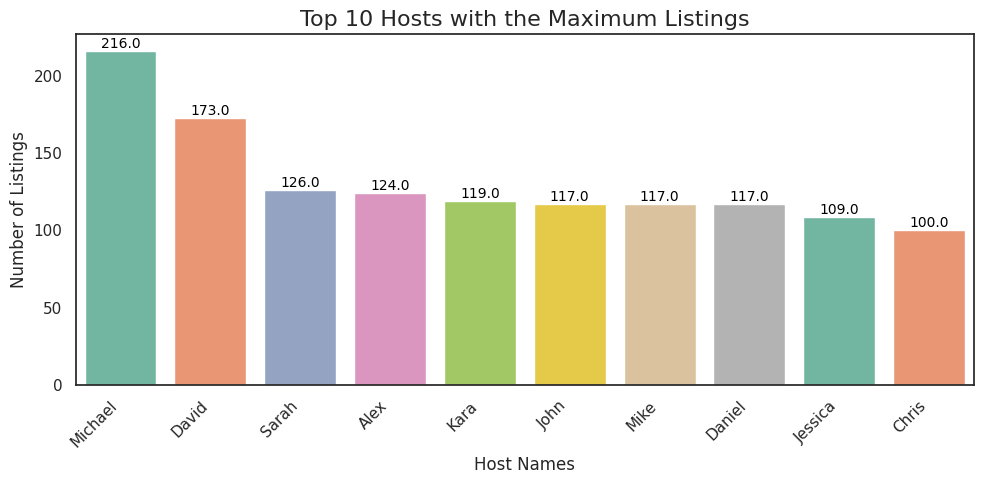

In [28]:
max_host()

In [29]:
def neighbourhood_group() :
    plt.figure(figsize=(10, 5))

    df_h = df[df['host_name'] == 'Michael']
    host_listings = df_h.groupby(['neighbourhood_group'])['name'].count()

    # Create a color palette
    colors = sns.color_palette('viridis')

    # Create the bar plot
    host_listings.plot(kind='bar', color=colors)

    # Set plot title and axis labels
    plt.title("Top Host (Michael's) Listings Across the City", fontsize=16)
    plt.xlabel('Neighbourhood Group', fontsize=12)
    plt.ylabel('Number of Listings', fontsize=12)

    # Rotate x-axis labels and adjust alignment
    plt.xticks(rotation=45, ha='right')

    # Add data labels to the bars
    for i, value in enumerate(host_listings):
        plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()
    root.mainloop()

In [30]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [31]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [32]:
len(df.neighbourhood.unique())

205

In [33]:
#Maximum and Minimum number of properties located in:
df['neighbourhood'].value_counts()

Williamsburg          1990
Bedford-Stuyvesant    1617
Harlem                1328
Upper West Side       1058
East Village          1014
                      ... 
Neponsit                 1
East Morrisania          1
Dongan Hills             1
Lighthouse Hill          1
Olinville                1
Name: neighbourhood, Length: 205, dtype: int64

In [34]:
#Graph for maximum number of listings in top 10 neighbourhoods
data = df.neighbourhood.value_counts()[:10]
data

Williamsburg          1990
Bedford-Stuyvesant    1617
Harlem                1328
Upper West Side       1058
East Village          1014
Bushwick               968
Upper East Side        899
Hell's Kitchen         766
Crown Heights          761
Greenpoint             605
Name: neighbourhood, dtype: int64

In [35]:
def popular_neighbourhood():
    data = df['neighbourhood'].value_counts()[:10]

    plt.figure(figsize=(12, 8))

    # Define a color palette
    colors = sns.color_palette('viridis', len(data))

    # Extract x and y values
    x = data.index
    y = data.values

    # Create the bar plot
    plt.barh(x, y, color=colors)

    # Set plot title and axis labels
    plt.title("Most Popular Neighbourhood", fontsize=16)
    plt.xlabel("Number of Guests Hosting in this Area", fontsize=12)
    plt.ylabel("Neighbourhood Area", fontsize=12)

    # Add data labels to the bars
    for i, v in enumerate(y):
        plt.text(v, i, str(v), ha='left', va='center', fontsize=10, color='black')

    # Adjust y-axis labels alignment
    plt.tick_params(axis='y', pad=8)

    # Show the plot
    plt.tight_layout()
    plt.show()
    root.mainloop()

In [36]:
def number_property():
    #Harlem neighbourhood has largest number of properties listed

    df_1 = df[df['neighbourhood_group'] == 'Manhattan']
    plt.figure(figsize=(10, 5))

    # Set the color
    color = [0.4660, 0.6740, 0.1880]

    # Calculate the number of listings
    listings = df_1.groupby('neighbourhood')['name'].count()

    # Create the bar plot
    listings.plot(kind='bar', color=color)

    # Set plot title and axis labels
    plt.title("Number of Properties Listed in Each Neighbourhood (Manhattan)", fontsize=16)
    plt.xlabel("Neighbourhood", fontsize=12)
    plt.ylabel("Number of Listings", fontsize=12)

    # Add data labels to the bars
    for i, v in enumerate(listings):
        plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()
    root.mainloop()

In [37]:
#Most Famous Top 5 Properties in terms of reviews in NYC
top_reviewed_hosts= df.nlargest(10,'number_of_reviews').head(5)
top_reviewed_hosts

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47.0,1.0,629.0,2019-07-05,14.58,2.0,333.0
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49.0,1.0,607.0,2019-06-21,7.75,3.0,293.0
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49.0,1.0,597.0,2019-06-23,7.72,3.0,342.0
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49.0,1.0,594.0,2019-06-15,7.57,3.0,339.0
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47.0,1.0,576.0,2019-06-27,13.40,2.0,173.0


<Figure size 800x500 with 0 Axes>

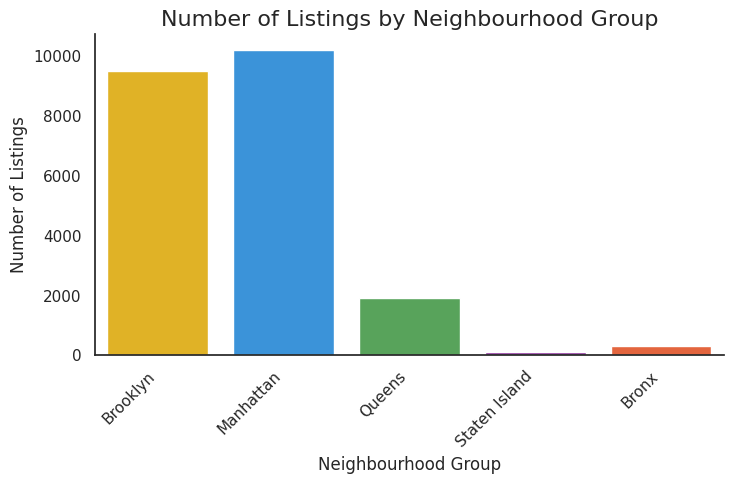

In [38]:
#Largest number of listings came from Manhattan area.
plt.figure(figsize=(8, 5))

# Set a color palette
colors = ['#FFC107', '#2196F3', '#4CAF50', '#9C27B0', '#FF5722']

# Create the catplot
cat_plot = sns.catplot(x="neighbourhood_group", data=df, kind="count", palette=colors, height=5, aspect=1.5)

# Set plot title and axis labels
cat_plot.ax.set_title("Number of Listings by Neighbourhood Group", fontsize=16)
cat_plot.set(xlabel="Neighbourhood Group", ylabel="Number of Listings")

# Adjust plot aesthetics
sns.despine()
cat_plot.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
def room_types():
    df_1 = df[df['neighbourhood_group'] == 'Manhattan']
    listings1 = df_1['room_type'].value_counts()

    plt.figure(figsize=(10, 5))

    # Define a color palette
    colors = sns.color_palette('pastel')

    # Create the bar plot
    listings1.plot(kind='bar', color=colors)

    # Set plot title and axis labels
    plt.title('Room Types in Manhattan', fontsize=16)
    plt.xlabel('Room Type', fontsize=12)
    plt.ylabel('Number of Rooms', fontsize=12)

    # Customize the plot aesthetics
    plt.xticks(rotation=0)
    plt.tick_params(axis='x', which='both', bottom=False)
    plt.grid(axis='y', linestyle='--')

    # Show the plot
    plt.tight_layout()
    plt.show()
    root.mainloop()

In [40]:
def type_property_rent():
    #Type of Properties available for rent in NYC
    plt.figure(figsize=(10, 8))

    # Define a color palette
    colors = sns.color_palette('Set3')

    # Create the categorical plot
    cat_plot = sns.catplot(x="room_type", data=df, kind="count", height=5, palette=colors)

    # Set plot title and axis labels
    plt.title("Types of Properties Available for Rent in NYC", fontsize=16)
    plt.xlabel("Room Type", fontsize=12)
    plt.ylabel("Number of Properties", fontsize=12)

    # Customize the plot aesthetics
    cat_plot.set_xticklabels(rotation=0)
    cat_plot.set_ylabels("Number of Properties")
    plt.xticks(fontsize=10)

    # Set the font scale
    sns.set(font_scale=1)

    # Show the plot
    plt.tight_layout()
    plt.show()
    root.mainloop()

In [41]:
def listings():
    room_ng = df.groupby(['neighbourhood_group', 'room_type'])['neighbourhood_group'].count().unstack()

    plt.figure(figsize=(10, 6))

    # Define a color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Create the bar plot
    room_ng.plot(kind='bar', color=colors)

    # Set plot title and axis labels
    plt.title('Number of Listings by Neighbourhood Group and Room Type', fontsize=16)
    plt.xlabel('Neighbourhood Group', fontsize=12)
    plt.ylabel('Number of Listings', fontsize=12)

    # Customize the legend
    plt.legend(title='Room Type', title_fontsize='12')

    # Rotate x-axis labels and adjust alignment
    plt.xticks(rotation=0)

    # Show the plot
    plt.tight_layout()
    plt.show()
    root.mainloop()

In [50]:
import tkinter as tk
from tkinter import *
import time
import datetime

root = tk.Tk()
root.geometry("4096x2160")
root.title('Analysis')
root.configure(background='#FF99BB')

topsFrame = Frame(root, width=2000)
topsFrame.pack(side=TOP)
topsFrame.configure(background='#EDF1F1')

frame = Frame(root, width=900, height=800)
frame.pack()
frame.configure(background='#A0E4F1')

localtime = time.asctime(time.localtime(time.time()))

# Menu Bar
menu1 = Menu(root)
root.config(menu=menu1)
subMenu1 = Menu(menu1)
menu1.add_cascade(label="File", menu=subMenu1)
subMenu1.add_command(label="Exit", command=root.destroy)
menu1.add_cascade(label="About")

# More code goes here
labelinfo = Label(tops, font=('arial', 40, 'bold'), text="NYC Analysis",bd=10, relief="raised", bg="#9F1E49", fg="white" )
labelinfo.grid(row = 0, column = 0)
#Time Label
labelinfo = Label(tops, font=('arial', 14, 'bold'),text = localtime , fg = "dark blue",bd = 10, anchor = 'w')
labelinfo.grid(row = 3, column = 0)
labelinfo = Label(tops, font=('arial', 14, 'bold'),text = "ANALYSIS:", fg = "dark blue",bd = 10, anchor = 'w')
labelinfo.grid(row = 5, column = 0)

labelinfo = Label(frame, font=('arial', 14, 'bold'),text=" MAX HOST DATA:", fg = "black",bd=10,bg="#A0E4F1",anchor=W)
labelinfo.grid(row = 7, column = 5)
labelinfo = Label(frame, font=('arial', 14, 'bold'),  text="NEIGHBOURHOOD GROUP:", fg = "black",bd=10,bg="#A0E4F1", anchor=W)
labelinfo.grid(row = 8, column = 5)
labelinfo = Label(frame, font=('arial', 14, 'bold'),  text="POPULAR NEIGHBOURHOOD:", fg = "black",bg="#A0E4F1",bd=10, anchor=W)
labelinfo.grid(row = 9, column = 5)
labelinfo = Label(frame, font=('arial', 14, 'bold'),  text="NUMBER OF PROPERTIES:", fg = "black",bg="#A0E4F1",bd=10, anchor=W)
labelinfo.grid(row = 10, column = 5)
labelinfo = Label(frame, font=('arial', 14, 'bold'),  text="TYPE OF PROPERTY FOR RENT:", fg = "black",bg="#A0E4F1",bd=10, anchor=W)
labelinfo.grid(row = 11, column = 5)
labelinfo = Label(frame, font=('arial', 14, 'bold'),  text="NO. OF LISTINGS BY NEIGHBOURHOOD GROUP AND ROOM TYPE:", fg = "black",bg="#A0E4F1",bd=10, anchor=W)
labelinfo.grid(row = 12, column = 5)

button1= Button(frame,text="CLICK HERE",command=max_host ,bd = 7.5, fg = "black",font=('mistral',15,'bold'),width=12, relief="sunken",bg="white")
button2= Button(frame,text="CLICK HERE",command=neighbourhood_group ,bd = 7.5, fg = "black",font=('mistral',15,'bold'),width=12, relief="sunken",bg="white")
button3= Button(frame,text='CLICK HERE',command=popular_neighbourhood  ,bd = 7.5, fg = "black",font=('mistral',15,'bold'),width=12, relief="sunken",bg="white")
button4= Button(frame,text="CLICK HERE",command=number_property ,bd = 7.5, fg = "black",font=('mistral',15,'bold'),width=12, relief="sunken",bg="white")
button5= Button(frame,text="CLICK HERE",command=type_property_rent ,bd = 7.5, fg = "black",font=('mistral',15,'bold'),width=12, relief="sunken",bg="white")
button6= Button(frame,text="CLICK HERE",command=listings ,bd = 7.5, fg = "black",font=('mistral',15,'bold'),width=12, relief="sunken",bg="white")

button1.grid(row=7,column=25)
button2.grid(row=8,column=25)
button3.grid(row=9,column=25)
button4.grid(row=10,column=25)
button5.grid(row=11,column=25)
button6.grid(row=12,column=25)
root.mainloop()


TclError: no display name and no $DISPLAY environment variable